In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,123.219382,76.360446,5.226368,4.860753,1.588476,1.666765,2.976220,26.754810,4.841088,71.557080,5.729084,3.006123,3.209935,0.061585,0.302812
std,14.686155,0.477530,3.397294,17.513858,11.004056,0.781089,0.925377,1.260003,1.079377,0.892196,22.279922,1.251566,16.937394,1.424568,1.199571,0.939842,0.240428,0.459528
min,22.000000,1.000000,15.600000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,4.860753,3.200000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,1.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,3.960000,60.000000,4.900000,3.000000,3.000000,0.000000,0.000000
50%,46.000000,1.000000,24.000000,122.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,4.760000,72.000000,5.300000,3.000000,3.000000,0.000000,0.000000
75%,59.000000,2.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,5.570000,82.300000,6.020000,3.000000,3.000000,0.000000,1.000000
max,93.000000,2.000000,45.800000,200.000000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,17.730000,307.000000,29.700000,4.860753,4.860753,1.000000,1.000000


In [4]:
df=df.drop(columns='family_histroy')
df.replace(4.860753, np.nan, inplace=True)
df.dropna(inplace=True)


In [5]:
print(df.shape)

(3260, 17)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3260 entries, 0 to 4302
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       3260 non-null   int64  
 1   Gender    3260 non-null   int64  
 2   BMI       3260 non-null   float64
 3   SBP       3260 non-null   int64  
 4   DBP       3260 non-null   int64  
 5   FPG       3260 non-null   float64
 6   Chol      3260 non-null   float64
 7   Tri       3260 non-null   float64
 8   HDL       3260 non-null   float64
 9   LDL       3260 non-null   float64
 10  ALT       3260 non-null   float64
 11  BUN       3260 non-null   float64
 12  CCR       3260 non-null   float64
 13  FFPG      3260 non-null   float64
 14  smoking   3260 non-null   float64
 15  drinking  3260 non-null   float64
 16  Diabetes  3260 non-null   int64  
dtypes: float64(12), int64(5)
memory usage: 458.4 KB


In [7]:
df["smoking"] = df["smoking"].replace({1.0: 0, 2.0: 0, 3.0: 1})

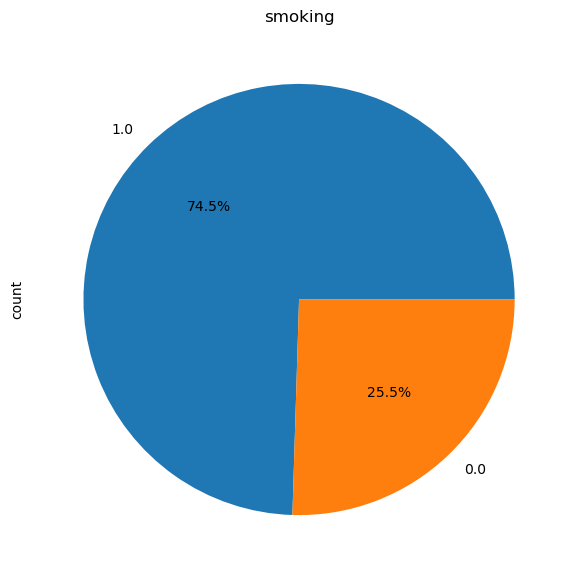

In [8]:
fig, axes = plt.subplots(figsize=(7, 7))
df['smoking'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('smoking')
plt.show()

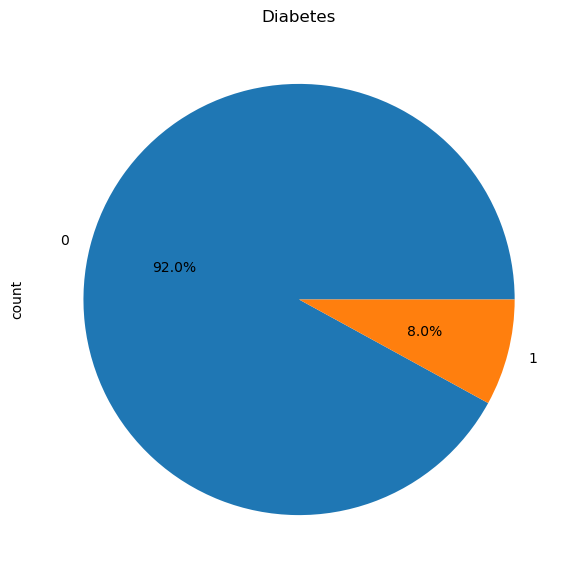

In [9]:
fig, axes = plt.subplots(figsize=(7, 7))
df['Diabetes'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('Diabetes')
plt.show()

In [10]:
df.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,1.0,3.0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,0.0,1.0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,1.0,3.0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,0.0,3.0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,1.0,3.0,0


In [11]:
df_copy=df
df_copy["smoking"] = df["smoking"].astype(int)
X = df_copy.drop('smoking', axis=1)
y = df_copy['smoking']

In [12]:
X.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,drinking,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,3.0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,0


In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 100, 300, step=20)
    max_depth = trial.suggest_int('max_depth', 5, 10)
    max_features = trial.suggest_int('max_features', 3, 10)

    scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

       
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            random_state=42,
            n_jobs=-1  
        )
        rf.fit(X_train_scaled, y_train)
        y_pred = rf.predict(X_val_scaled)
        acc = accuracy_score(y_val, y_pred)
        scores.append(acc)

    return np.mean(scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  


print("best_params:", study.best_params)
print(f"best_value: {study.best_value:.4f}")

[I 2025-08-22 16:19:34,420] A new study created in memory with name: no-name-7a2b7c1e-d841-44f8-bb32-9ca0ebae105a
[I 2025-08-22 16:19:35,408] Trial 0 finished with value: 0.766564417177914 and parameters: {'n_estimators': 220, 'max_depth': 6, 'max_features': 6}. Best is trial 0 with value: 0.766564417177914.
[I 2025-08-22 16:19:36,148] Trial 1 finished with value: 0.7641104294478527 and parameters: {'n_estimators': 160, 'max_depth': 5, 'max_features': 8}. Best is trial 0 with value: 0.766564417177914.
[I 2025-08-22 16:19:37,074] Trial 2 finished with value: 0.7668711656441718 and parameters: {'n_estimators': 220, 'max_depth': 7, 'max_features': 6}. Best is trial 2 with value: 0.7668711656441718.
[I 2025-08-22 16:19:37,688] Trial 3 finished with value: 0.7561349693251534 and parameters: {'n_estimators': 160, 'max_depth': 5, 'max_features': 4}. Best is trial 2 with value: 0.7668711656441718.
[I 2025-08-22 16:19:38,917] Trial 4 finished with value: 0.7671779141104295 and parameters: {'n_e

best_params: {'n_estimators': 280, 'max_depth': 10, 'max_features': 3}
best_value: 0.7681
